<a href="https://colab.research.google.com/github/asadali163/asadali163/blob/main/codebase/SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

df = pd.read_csv('airline-passengers.csv')

In [ ]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


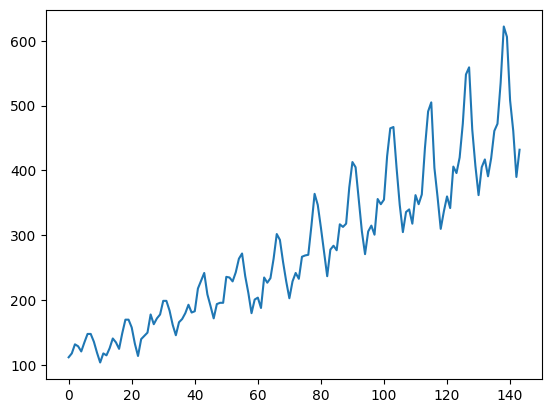

In [ ]:
df['Passengers'].plot();

### Working with SP500 dataset and Moving Averages

In [ ]:
!wget -O SPY.csv https://lazyprogrammer.me/course_files/sp500_close.csv

--2024-07-08 08:08:19--  https://lazyprogrammer.me/course_files/sp500_close.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4143332 (4.0M) [text/csv]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>]   3.95M  --.-KB/s    in 0.08s   

2024-07-08 08:08:19 (50.5 MB/s) - ‘SPY.csv’ saved [4143332/4143332]



In [ ]:
df = pd.read_csv('SPY.csv', index_col=0, parse_dates=True)
df.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


In [ ]:
goog = df[['GOOG']].copy().dropna()
goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


In [ ]:
goog.shape

(975, 1)

<Axes: >

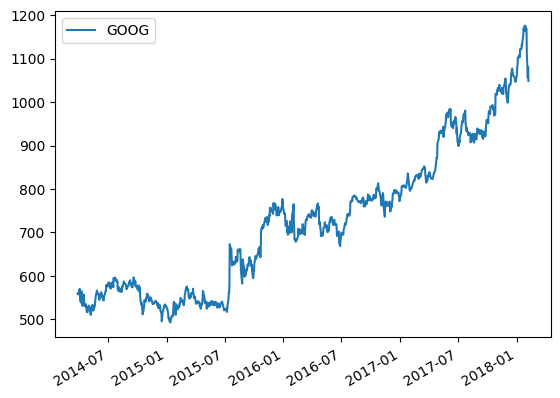

In [ ]:
goog.plot()

In [ ]:
# Log return of google stock prices
goog_ret = np.log(goog.pct_change(1) + 1)

<Axes: >

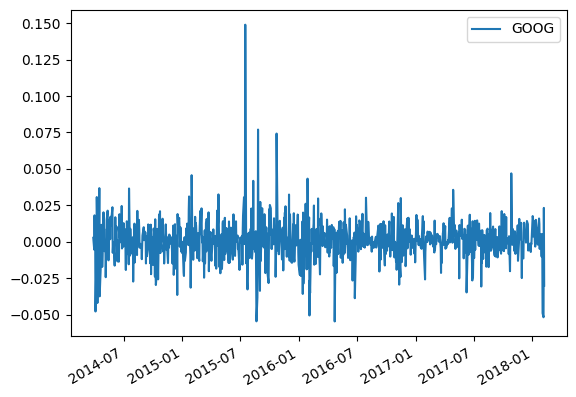

In [ ]:
goog_ret.plot()

In [ ]:
goog['SMA-10'] = goog['GOOG'].rolling(10).mean()

<Axes: >

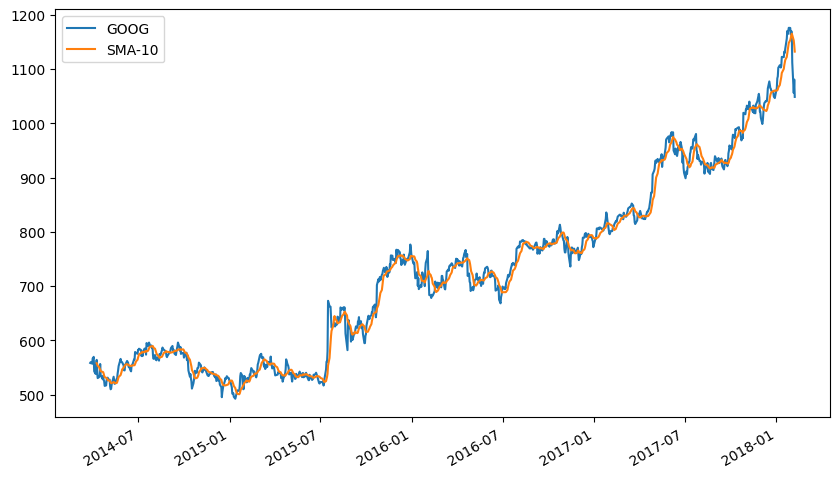

In [ ]:
goog.plot(figsize=(10, 6))

<Axes: >

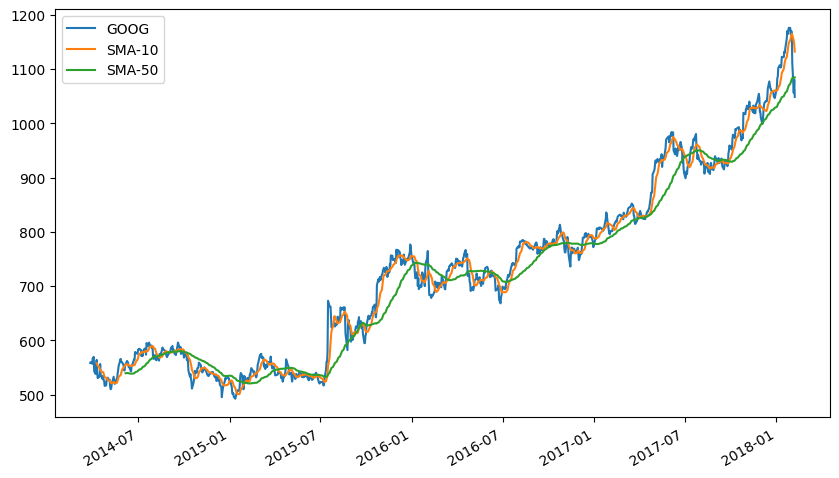

In [ ]:
goog['SMA-50'] = goog['GOOG'].rolling(50).mean()
goog.plot(figsize=(10, 6))

### Now we will work on goog and apple stock

In [ ]:
goog_appl = df[['GOOG', 'AAPL']].copy().dropna()
cov = goog_appl.rolling(10).cov()
cov

GOOG        AAPL
2014-03-27 GOOG          NaN         NaN
           AAPL          NaN         NaN
2014-03-28 GOOG          NaN         NaN
           AAPL          NaN         NaN
2014-03-31 GOOG          NaN         NaN
...                      ...         ...
2018-02-05 AAPL   195.581219   36.940677
2018-02-06 GOOG  1951.745849  204.834022
           AAPL   204.834022   28.738600
2018-02-07 GOOG  2758.101667  244.260956
           AAPL   244.260956   25.756929

[1950 rows x 2 columns]

In [ ]:
cov.loc['2018-02-07'].to_numpy()

array([[2758.10166667,  244.26095556],
       [ 244.26095556,   25.75692889]])

In [ ]:
goog_appl_ret = np.log(1 + goog_appl.pct_change(1))
goog_appl_ret.head()

,GOOG,AAPL
2014-03-27,NaN,NaN
2014-03-28,0.002736,-0.001117
2014-03-31,-0.005408,-0.000223
2014-04-01,0.018130,0.009106
2014-04-02,-0.000282,0.001661


In [ ]:
goog_appl_ret['GOOG-SMA-10'] = goog_appl_ret['GOOG'].rolling(10).mean()
goog_appl_ret['AAPL-SMA-10'] = goog_appl_ret['AAPL'].rolling(10).mean()

<Axes: >

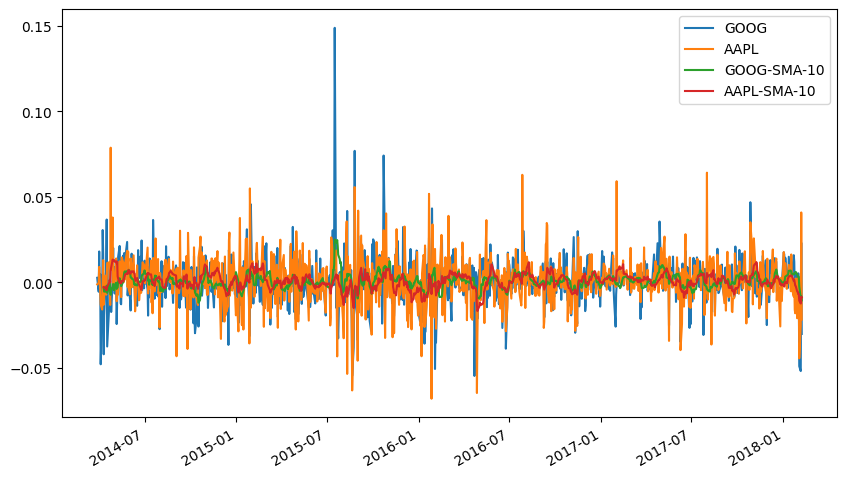

In [ ]:
goog_appl_ret.plot(figsize=(10, 6))

In [ ]:
corr_goog_aapl_ret = goog_appl_ret[['GOOG-SMA-10', 'AAPL-SMA-10']].rolling(50).corr()
corr_goog_aapl_ret.tail(16)

GOOG-SMA-10  AAPL-SMA-10
2018-01-29 GOOG-SMA-10     1.000000     0.528194
           AAPL-SMA-10     0.528194     1.000000
2018-01-30 GOOG-SMA-10     1.000000     0.487428
           AAPL-SMA-10     0.487428     1.000000
2018-01-31 GOOG-SMA-10     1.000000     0.443907
           AAPL-SMA-10     0.443907     1.000000
2018-02-01 GOOG-SMA-10     1.000000     0.395876
           AAPL-SMA-10     0.395876     1.000000
2018-02-02 GOOG-SMA-10     1.000000     0.444516
           AAPL-SMA-10     0.444516     1.000000
2018-02-05 GOOG-SMA-10     1.000000     0.582727
           AAPL-SMA-10     0.582727     1.000000
2018-02-06 GOOG-SMA-10     1.000000     0.632848
           AAPL-SMA-10     0.632848     1.000000
2018-02-07 GOOG-SMA-10     1.000000     0.675019
           AAPL-SMA-10     0.675019     1.000000

In [ ]:
goog_appl_ret.tail()

,GOOG,AAPL,GOOG-SMA-10,AAPL-SMA-10
2018-02-01,-0.001916,0.002088,0.003300,-0.006618
2018-02-02,-0.048966,-0.044360,-0.002277,-0.010607
2018-02-05,-0.051771,-0.025302,-0.009050,-0.012316
2018-02-06,0.023218,0.040942,-0.007946,-0.008244
2018-02-07,-0.030080,-0.021640,-0.010463,-0.008802
